# 필요한 라이브러리 선언

In [1]:
#데이터 처리 라이브러리
import pandas as pd
import numpy as np

#머신러닝 라이브러리
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 자동 분리 라이브러리, 위의 것과는 달리 순차적이 아닌 랜덤으로 비율에 맞춰 선정한다.
from sklearn.model_selection import train_test_split 

# A.데이터 전처리

### A-1. 타입통합 / 특성 숫자칼럼 추가

In [2]:
# 학습용 데이터
basicTrainData = pd.read_csv("../dataset/train.csv")

In [3]:
basicTrainData

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,TRAIN_2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,TRAIN_2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,TRAIN_2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


In [4]:
ncData = pd.DataFrame(basicTrainData.isnull().sum(), columns=["NULL_COUNT"])
ncData

,NULL_COUNT
ID,0
착과량(int),0
수고(m),0
수관폭1(min),0
수관폭2(max),0
...,...
2022-11-24 엽록소,0
2022-11-25 엽록소,0
2022-11-26 엽록소,0
2022-11-27 엽록소,0


In [5]:
# null값이 있는지 확인
ncData.loc[ncData.NULL_COUNT>0]

,NULL_COUNT


In [6]:
# 사용할수 없는 id데이터 삭제
basicTrainData = basicTrainData.drop(columns=["ID"])
basicTrainData

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,3.5,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,4.4,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,2.9,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,2.9,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,3.8,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


In [7]:
pd.DataFrame(basicTrainData.dtypes, columns=["TYPE"])

,TYPE
착과량(int),int64
수고(m),float64
수관폭1(min),float64
수관폭2(max),float64
수관폭평균,float64
...,...
2022-11-24 엽록소,float64
2022-11-25 엽록소,float64
2022-11-26 엽록소,float64
2022-11-27 엽록소,float64


In [8]:
basicCol = basicTrainData.columns

In [9]:
for i in range(len(basicCol)):
    try : 
        basicTrainData[basicCol[i]] = basicTrainData[basicCol[i]].astype(float)
    except Exception as e :
        e
basicTrainData.dtypes

착과량(int)          float64
수고(m)             float64
수관폭1(min)         float64
수관폭2(max)         float64
수관폭평균             float64
                   ...   
2022-11-24 엽록소    float64
2022-11-25 엽록소    float64
2022-11-26 엽록소    float64
2022-11-27 엽록소    float64
2022-11-28 엽록소    float64
Length: 183, dtype: object

### A-2 특성선정 / 데이터 분리

In [10]:
corrDf = basicTrainData.corr()
stdCorr = 0.5

In [11]:
features = list(corrDf.loc[(abs(corrDf["착과량(int)"]) >= stdCorr) & (corrDf["착과량(int)"] != 1)].index)

In [12]:
label = ["착과량(int)"]

In [13]:
trainDataFeature ,\
testDataFeature ,\
trainDataLabel, \
testDataLabel = train_test_split(basicTrainData.loc[:,features], basicTrainData.loc[:,label], test_size=0.2, random_state=10) 

In [14]:
print(trainDataFeature.shape)
print(trainDataLabel.shape)
print(testDataFeature.shape)
print(testDataLabel.shape)

(1765, 82)
(1765, 1)
(442, 82)
(442, 1)


# B.모델적용

### B-3 모델적용

In [15]:
dtModel = tree.DecisionTreeRegressor(random_state=10, max_depth=3) 
# max_depth : 최대 깊이를 제한해서 나중에 plot_tree를 만들때 시간을 단축하고, 그래프를 간단하게 볼 수 있다.
# 단점이라면 탐색의 깊이를 제한했다.
# feature_names=['', '']를 이용해서 노드에서 특성의 이름을 볼 수 있다.
dtModel

DecisionTreeRegressor(max_depth=3, random_state=10)

In [16]:
dtModel.fit(X = trainDataFeature,
            y = trainDataLabel)

DecisionTreeRegressor(max_depth=3, random_state=10)

[Text(0.5, 0.875, 'X[6] <= 3.55\nsquared_error = 47526.65\nsamples = 1765\nvalue = 410.169'),
 Text(0.25, 0.625, 'X[8] <= 2.85\nsquared_error = 12126.488\nsamples = 885\nvalue = 596.593'),
 Text(0.125, 0.375, 'X[3] <= 2.65\nsquared_error = 3937.224\nsamples = 420\nvalue = 690.995'),
 Text(0.0625, 0.125, 'squared_error = 1346.034\nsamples = 176\nvalue = 748.926'),
 Text(0.1875, 0.125, 'squared_error = 1639.477\nsamples = 244\nvalue = 649.209'),
 Text(0.375, 0.375, 'X[0] <= 3.45\nsquared_error = 4203.579\nsamples = 465\nvalue = 511.327'),
 Text(0.3125, 0.125, 'squared_error = 1944.641\nsamples = 275\nvalue = 553.287'),
 Text(0.4375, 0.125, 'squared_error = 1236.357\nsamples = 190\nvalue = 450.595'),
 Text(0.75, 0.625, 'X[1] <= 4.45\nsquared_error = 13026.329\nsamples = 880\nvalue = 222.685'),
 Text(0.625, 0.375, 'X[0] <= 4.15\nsquared_error = 4368.249\nsamples = 500\nvalue = 304.246'),
 Text(0.5625, 0.125, 'squared_error = 1853.059\nsamples = 249\nvalue = 357.787'),
 Text(0.6875, 0.125, 

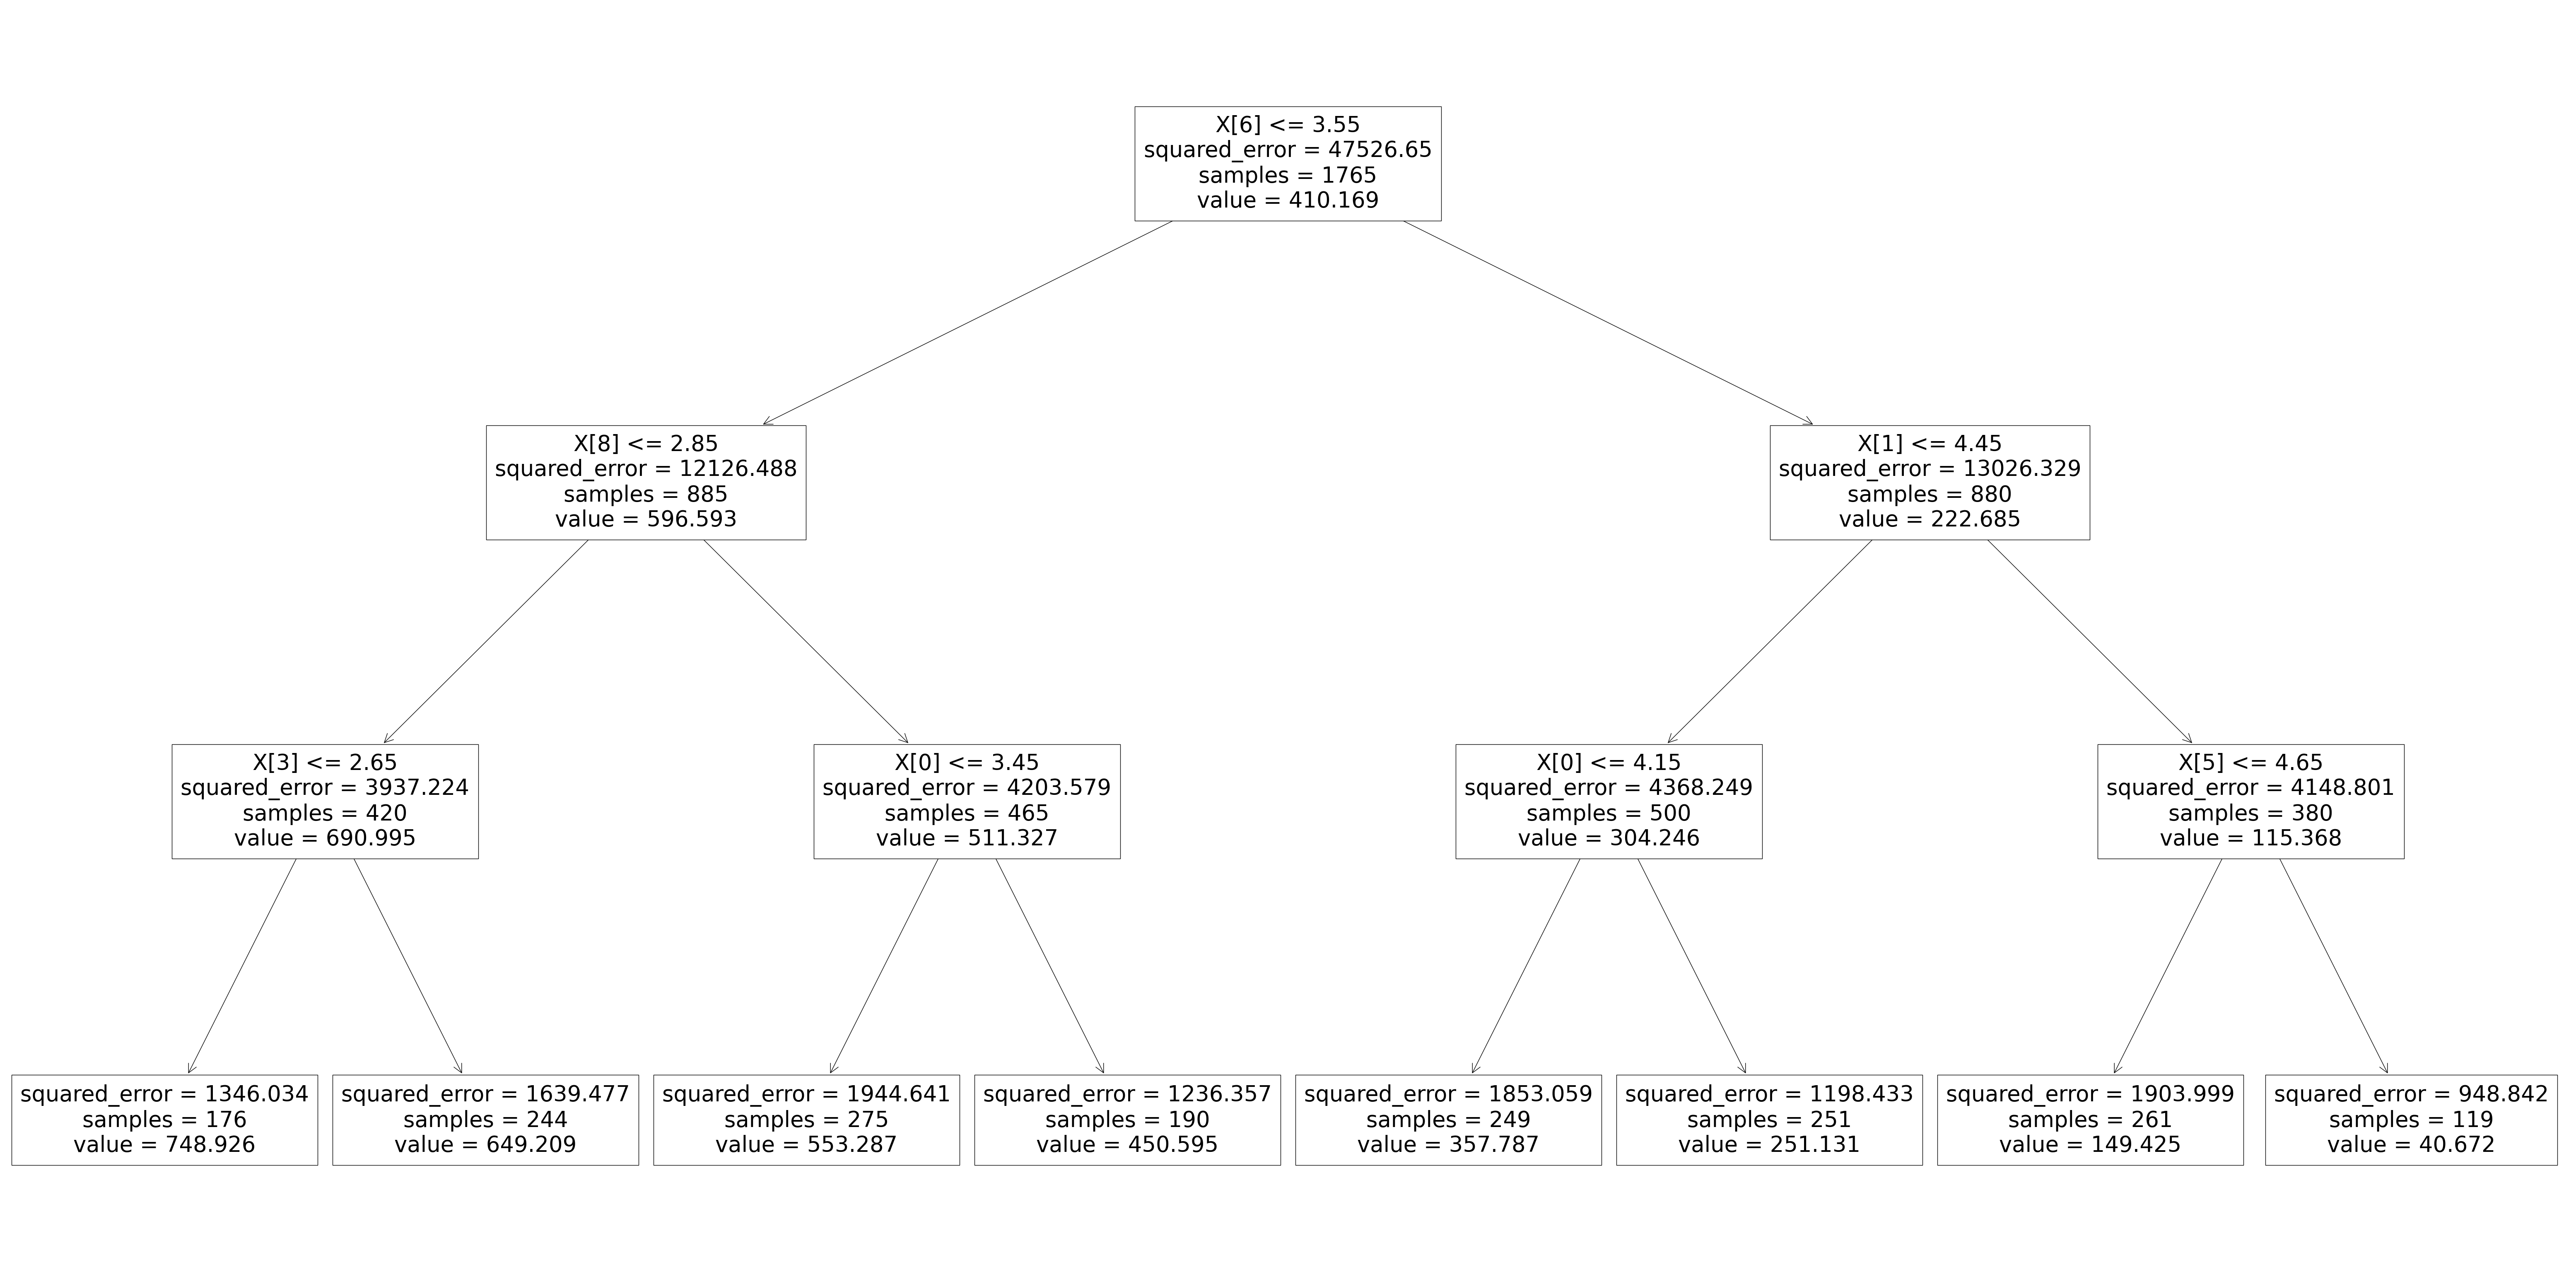

In [17]:
plt.figure(figsize=(80,40))
plot_tree(dtModel)

In [18]:
# feature_importances_ : 어떤 특성이 영향을 크게 끼쳤는지 알 수 있다.
# 여기서는 컬럼이 날짜만 다르고 동일해서 알아봤자 의미가 없는 것 같다.
print(dtModel.feature_importances_)
len(dtModel.feature_importances_) # 칼럼의 갯수와 같다

[0.03214178 0.0949685  0.         0.01253547 0.         0.01191885
 0.76060395 0.         0.08783144 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


82

# C. 예측 / 검증

### C-4. 예측

In [19]:
predictDT = dtModel.predict(X = testDataFeature)

### C-5. 검증

In [20]:
testDataLabel["DT"] = predictDT
testDataLabel.reset_index(drop=True)

,착과량(int),DT
0,455.0,450.594737
1,291.0,251.131474
2,339.0,357.787149
3,446.0,450.594737
4,42.0,40.672269
...,...,...
437,33.0,40.672269
438,368.0,251.131474
439,219.0,251.131474
440,284.0,251.131474


### C-4. 예측

In [21]:
# 예측용 데이터
basictestData = pd.read_csv("../dataset/test.csv")

### 예측용 데이터 전처리

In [22]:
testData = basictestData.loc[:,features]
testData.shape

(2208, 82)

In [23]:
ID = basictestData.ID
resultData = pd.DataFrame(ID)
resultData

,ID
0,TEST_0000
1,TEST_0001
2,TEST_0002
3,TEST_0003
4,TEST_0004
...,...
2203,TEST_2203
2204,TEST_2204
2205,TEST_2205
2206,TEST_2206


In [24]:
testData

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-12 새순,2022-11-13 새순,2022-11-14 새순,2022-11-15 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,4.3,4.2,4.2,4.1,4.1,4.1,4.0,4.0,3.9,3.9,...,1.1,1.1,1.0,1.0,0.6,0.6,0.6,0.5,0.0,0.0
1,2.5,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4,2.4,...,1.0,1.0,0.9,0.9,0.7,0.7,0.7,0.7,0.6,0.6
2,4.7,4.7,4.6,4.6,4.5,4.5,4.4,4.4,4.3,4.3,...,1.2,1.2,1.1,1.1,0.7,0.6,0.6,0.5,0.0,0.0
3,3.6,3.6,3.6,3.6,3.5,3.5,3.4,3.4,3.4,3.3,...,1.1,1.1,1.0,1.0,0.7,0.6,0.6,0.6,0.5,0.0
4,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,2.5,2.5,...,1.0,1.0,1.0,1.0,0.8,0.7,0.7,0.7,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2.5,2.5,2.4,2.4,2.4,2.4,2.3,2.3,2.3,2.3,...,0.9,0.9,0.9,0.9,0.7,0.7,0.7,0.6,0.6,0.6
2204,4.1,4.1,4.1,4.0,4.0,3.9,3.9,3.8,3.8,3.7,...,1.1,1.1,1.0,1.0,0.6,0.6,0.6,0.5,0.0,0.0
2205,3.8,3.8,3.8,3.7,3.7,3.7,3.6,3.6,3.5,3.5,...,1.2,1.1,1.1,1.1,0.8,0.7,0.7,0.7,0.6,0.6
2206,4.5,4.4,4.4,4.3,4.3,4.2,4.2,4.2,4.1,4.1,...,1.2,1.1,1.1,1.1,0.7,0.7,0.6,0.5,0.0,0.0


### 예측개시

In [25]:
result = dtModel.predict(X = testData)

### 예측 결과

In [26]:
resultStepData = pd.DataFrame(result, columns=["착과량"])
resultStepData

,착과량
0,251.131474
1,748.926136
2,149.425287
3,450.594737
4,649.209016
...,...
2203,748.926136
2204,357.787149
2205,357.787149
2206,251.131474


In [27]:
resultData["착과량"] = resultStepData
resultData

,ID,착과량
0,TEST_0000,251.131474
1,TEST_0001,748.926136
2,TEST_0002,149.425287
3,TEST_0003,450.594737
4,TEST_0004,649.209016
...,...,...
2203,TEST_2203,748.926136
2204,TEST_2204,357.787149
2205,TEST_2205,357.787149
2206,TEST_2206,251.131474


# 최종결과

In [28]:
# ID, 척과량, 조건들
finalResult = pd.concat([resultData, testData], axis = 1)
finalResult

,ID,착과량,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,...,2022-11-12 새순,2022-11-13 새순,2022-11-14 새순,2022-11-15 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,TEST_0000,251.131474,4.3,4.2,4.2,4.1,4.1,4.1,4.0,4.0,...,1.1,1.1,1.0,1.0,0.6,0.6,0.6,0.5,0.0,0.0
1,TEST_0001,748.926136,2.5,2.5,2.5,2.5,2.5,2.4,2.4,2.4,...,1.0,1.0,0.9,0.9,0.7,0.7,0.7,0.7,0.6,0.6
2,TEST_0002,149.425287,4.7,4.7,4.6,4.6,4.5,4.5,4.4,4.4,...,1.2,1.2,1.1,1.1,0.7,0.6,0.6,0.5,0.0,0.0
3,TEST_0003,450.594737,3.6,3.6,3.6,3.6,3.5,3.5,3.4,3.4,...,1.1,1.1,1.0,1.0,0.7,0.6,0.6,0.6,0.5,0.0
4,TEST_0004,649.209016,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,...,1.0,1.0,1.0,1.0,0.8,0.7,0.7,0.7,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,TEST_2203,748.926136,2.5,2.5,2.4,2.4,2.4,2.4,2.3,2.3,...,0.9,0.9,0.9,0.9,0.7,0.7,0.7,0.6,0.6,0.6
2204,TEST_2204,357.787149,4.1,4.1,4.1,4.0,4.0,3.9,3.9,3.8,...,1.1,1.1,1.0,1.0,0.6,0.6,0.6,0.5,0.0,0.0
2205,TEST_2205,357.787149,3.8,3.8,3.8,3.7,3.7,3.7,3.6,3.6,...,1.2,1.1,1.1,1.1,0.8,0.7,0.7,0.7,0.6,0.6
2206,TEST_2206,251.131474,4.5,4.4,4.4,4.3,4.3,4.2,4.2,4.2,...,1.2,1.1,1.1,1.1,0.7,0.7,0.6,0.5,0.0,0.0
